# Import libraries

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

# Read data

In [2]:
df_train = pd.read_csv("data/train_2016_v2.csv", parse_dates=["transactiondate"])
print "This file has has the y value with ", df_train.shape[0], "rows and ", df_train.shape[1], " columns"
print "And here are the first five columns"
df_train.head()

This file has has the y value with  90275 rows and  3  columns
And here are the first five columns


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
df_prop = pd.read_csv("data/properties_2016.csv",low_memory=False)
print "This file has features with ", df_prop.shape[0], "rows and ", df_prop.shape[1], " columns"
print "And here are the first five columns"
df_prop.head()

This file has features with  2985217 rows and  58  columns
And here are the first five columns


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [11]:
print 'And here are the columns: ',  list(df_prop.columns)

And here are the columns:  ['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'fireplaceflag', 'structuret

# Distributation of target

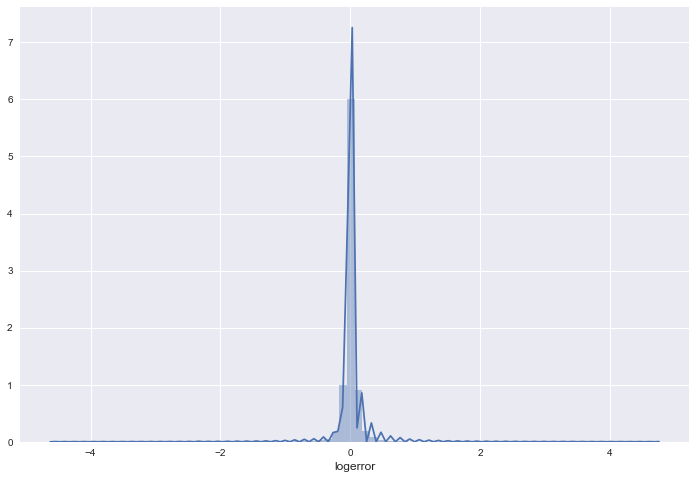

In [13]:
ax = plt.figure(figsize=(12,8))

sns.distplot(df_train.logerror.values, bins=80, kde=True)
plt.xlabel('logerror', fontsize=12)
ax.set_facecolor('white')

plt.show()

# Merge tables

In [14]:
df_train_full = pd.merge(df_train, df_prop, on='parcelid', how='left')
df_train_full.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


## Let's see what percentage of each feature is missing, main dataset

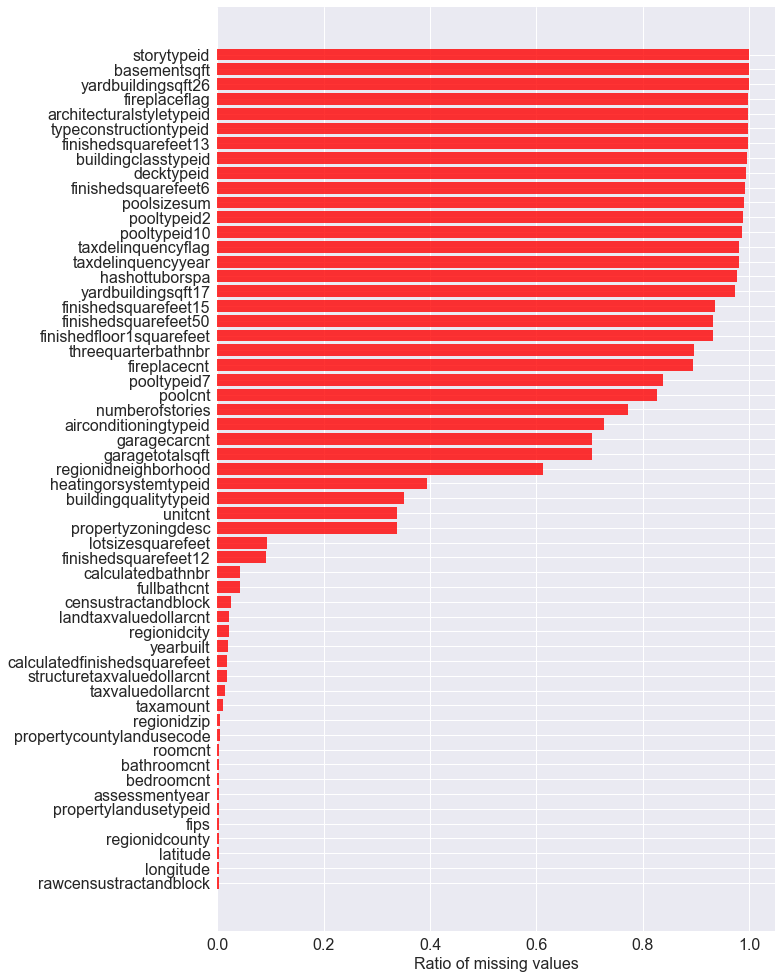

In [15]:
##
df_missing = df_prop.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing.missing_count = df_missing.missing_count/float(df_prop.shape[0])
df_missing = df_missing.loc[df_missing['missing_count']>0]
df_missing = df_missing.sort_values(by='missing_count')

ind = np.arange(df_missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,17))
rects = ax.barh(ind, df_missing.missing_count.values, color='red', alpha = 0.8)
ax.set_yticks(ind)
ax.tick_params(labelsize=16)
ax.set_yticklabels(df_missing.column_name.values, rotation='horizontal')
ax.set_xlabel("Ratio of missing values",fontsize = 16)
#ax.set_facecolor('white')
plt.show()

## Let's see what percentage of each feature is missing, train dataset

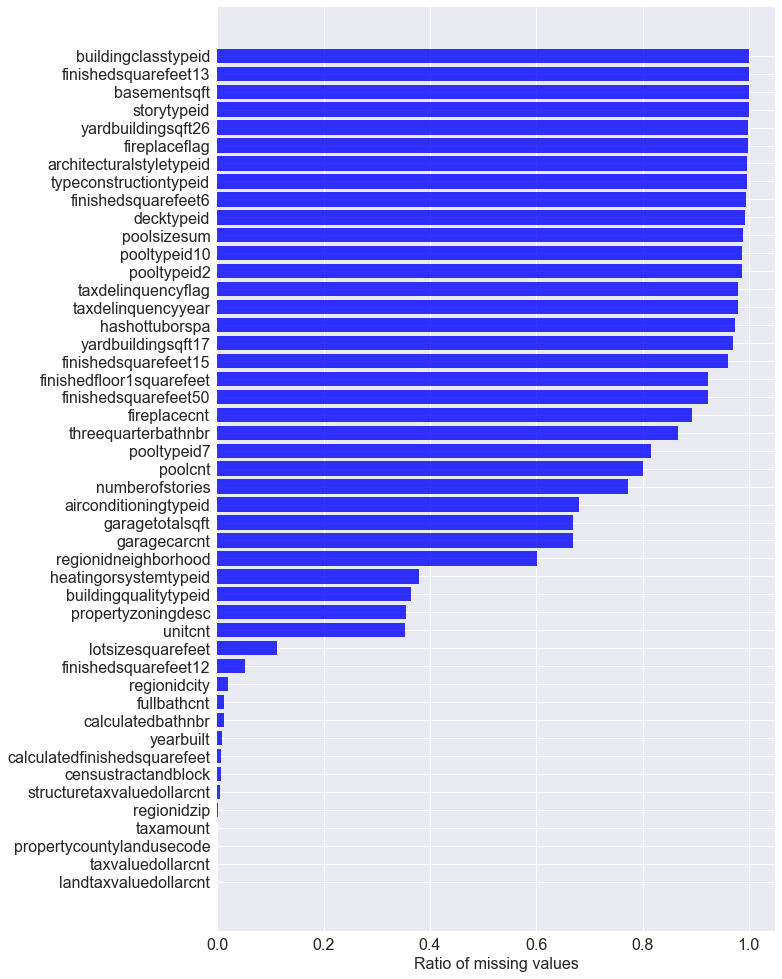

In [17]:
##
df_missing = df_train_full.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing.missing_count = df_missing.missing_count/float(df_train_full.shape[0])
df_missing = df_missing.loc[df_missing['missing_count']>0]
df_missing = df_missing.sort_values(by='missing_count')

ind = np.arange(df_missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,17))
rects = ax.barh(ind, df_missing.missing_count.values, color='blue', alpha = 0.8)
ax.set_yticks(ind)
ax.tick_params(labelsize=16)
ax.set_yticklabels(df_missing.column_name.values, rotation='horizontal')
ax.set_xlabel("Ratio of missing values",fontsize = 16)
#ax.set_facecolor('white')
plt.show()


## hmm.. how many rows we have with k missing values

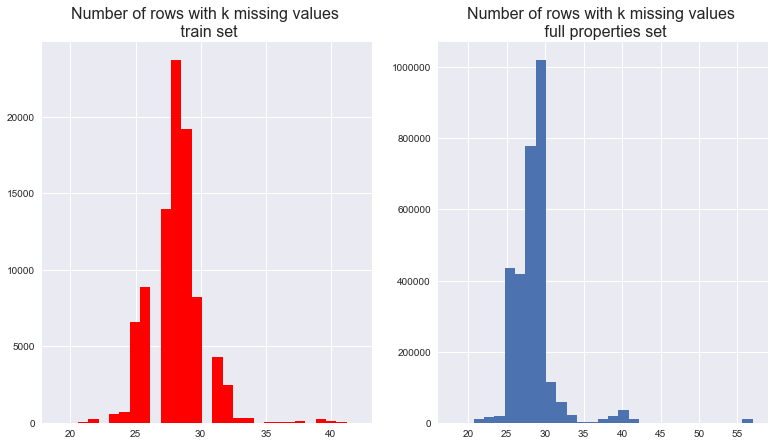

In [20]:
df_missing_row1 = df_train_full.isnull().sum(axis=1) 
df_missing_row2 = df_prop.isnull().sum(axis=1) 

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(13,7))
#ax1.set_facecolor('white')
ax1.hist(df_missing_row1,29, normed=0, color='red')
ax1.set_title("Number of rows with k missing values \n train set",fontsize = 16)
#ax2.set_facecolor('white')
ax2.hist(df_missing_row2,29, normed=0)
ax2.set_title("Number of rows with k missing values \n full properties set",fontsize = 16)



## hmm.. lets look at the location of the data where we have the target

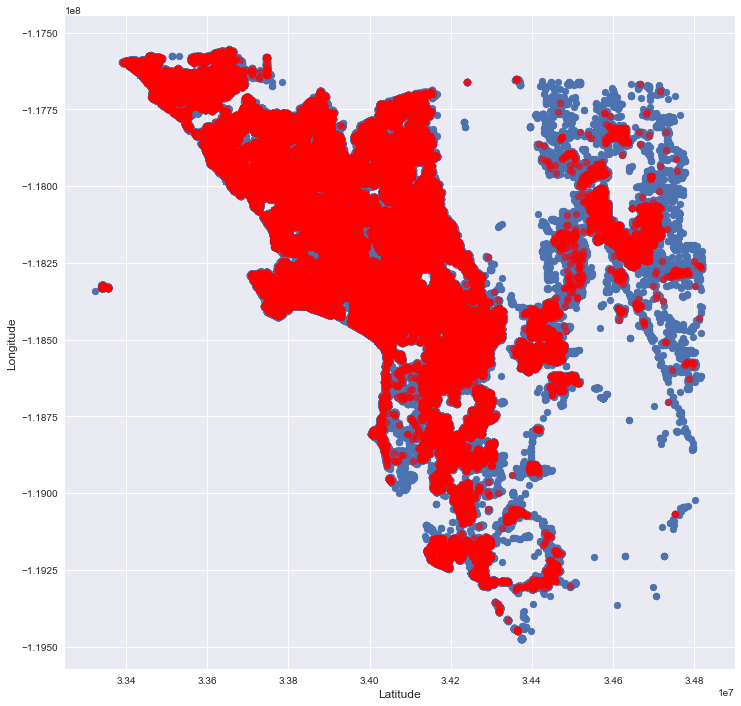

In [23]:
plt.figure(figsize=(12,12))
plt.scatter(x=df_prop.latitude.values, y=df_prop.longitude.values)
plt.scatter(x=df_train_full.latitude.values, y=df_train_full.longitude.values,color='red', alpha = 0.6)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

## hmm.. location of rows with k > 29 missing values

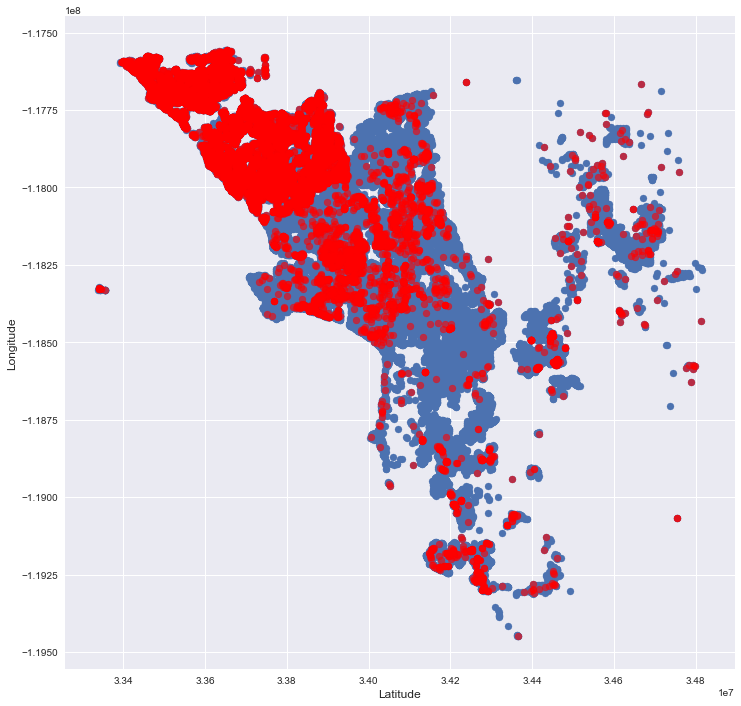

In [24]:
df_train_full['ratio_missing'] = df_train_full.isnull().sum(axis=1) 
df_temp = df_train_full[df_train_full['ratio_missing']>29]
plt.figure(figsize=(12,12))
plt.scatter(x=df_train_full.latitude.values, y=df_train_full.longitude.values)
plt.scatter(x=df_temp.latitude.values, y=df_temp.longitude.values,color='red', alpha = 0.6)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

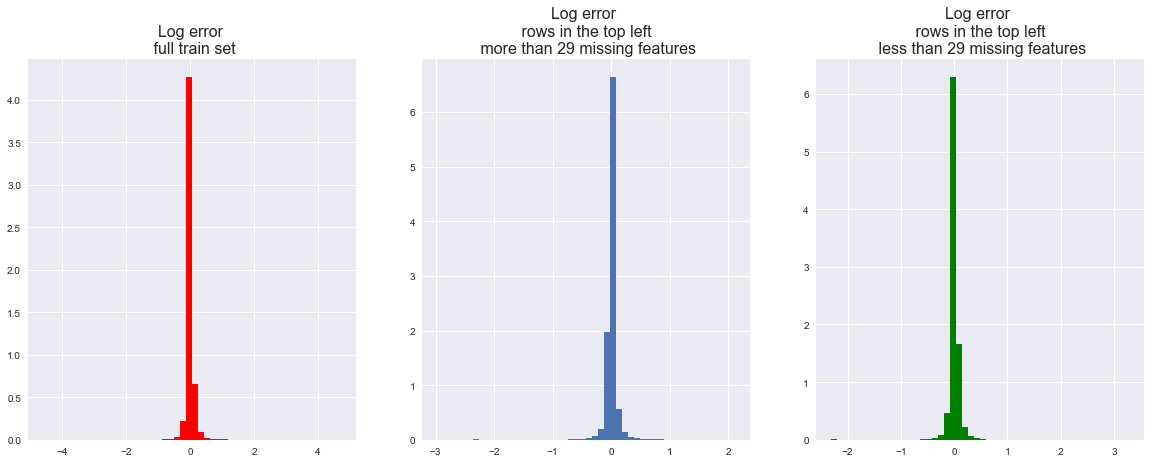

In [27]:

df_train_full['ratio_missing'] = df_train_full.isnull().sum(axis=1)  
df_temp1 = df_train_full[(df_train_full['longitude']>-1.18*1e8) & (df_train_full['latitude']<3.39*1e7)&(df_train_full['ratio_missing']>29)]
#df_temp2 = df_train_full[df_train_full['ratio_missing']<28]
df_temp2 = df_train_full[(df_train_full['longitude']>-1.18*1e8) & (df_train_full['latitude']<3.39*1e7)&(df_train_full['ratio_missing']<29)]


f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False,figsize=(20,7))
#ax1.set_facecolor('white')
ax1.hist(df_train_full.logerror,50, normed=1, color='red')
ax1.set_title("Log error \n full train set",fontsize = 16)
#ax2.set_facecolor('white')
ax2.hist(df_temp1.logerror,50, normed=1)
ax2.set_title("Log error \n rows in the top left \n more than 29 missing features",fontsize = 16)

ax3.hist(df_temp2.logerror,50, normed=1, color='green')
ax3.set_title("Log error \n rows in the top left \n less than 29 missing features",fontsize = 16)



In [29]:
df_temp1

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,ratio_missing
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,31
8,14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13,32
9,14677559,0.0843,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13,31
13,14665244,0.0816,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,NaN,398747.0,601000.0,2015.0,202253.0,6876.70,NaN,NaN,6.059063e+13,33
24,13957980,-0.1696,2016-01-03,NaN,NaN,NaN,2.5,2.0,NaN,NaN,...,NaN,157171.0,335790.0,2015.0,178619.0,4269.90,NaN,NaN,6.059089e+13,30
42,14337898,-0.0060,2016-01-03,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,NaN,183748.0,315989.0,2015.0,132241.0,4215.48,NaN,NaN,6.059076e+13,30
45,14008449,0.0450,2016-01-03,NaN,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,322700.0,526272.0,2015.0,203572.0,6517.74,NaN,NaN,6.059088e+13,31
52,14077187,-0.0171,2016-01-03,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,NaN,87166.0,324796.0,2015.0,237630.0,3767.14,NaN,NaN,6.059099e+13,30
53,14693306,0.0344,2016-01-03,NaN,NaN,NaN,2.5,2.0,NaN,NaN,...,NaN,137169.0,221868.0,2015.0,84699.0,2706.62,NaN,NaN,6.059111e+13,31
60,14030226,-0.0481,2016-01-04,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,NaN,41819.0,62165.0,2015.0,20346.0,1215.46,NaN,NaN,6.059099e+13,30


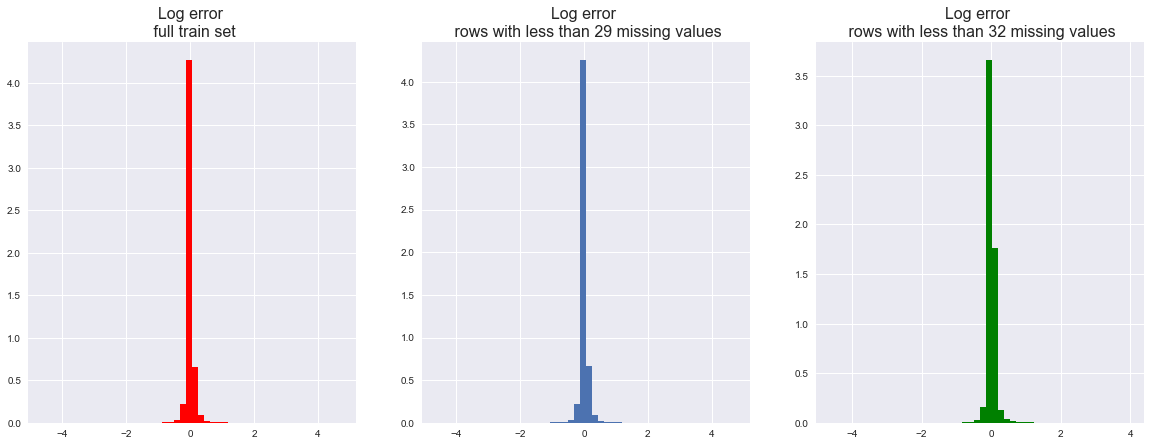

In [43]:

df_train_full['ratio_missing'] = df_train_full.isnull().sum(axis=1)  
df_temp1 = df_train_full[df_train_full['ratio_missing']<30]
df_temp2 = df_train_full[df_train_full['ratio_missing']<28]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False,figsize=(20,7))
#ax1.set_facecolor('white')
ax1.hist(df_train_full.logerror,50, normed=1, color='red')
ax1.set_title("Log error \n full train set",fontsize = 16)
#ax2.set_facecolor('white')
ax2.hist(df_temp1.logerror,50, normed=1)
ax2.set_title("Log error \n rows with less than 29 missing values",fontsize = 16)

ax3.hist(df_temp2.logerror,50, normed=1, color='green')
ax3.set_title("Log error \n rows with less than 32 missing values",fontsize = 16)



# correlation among features

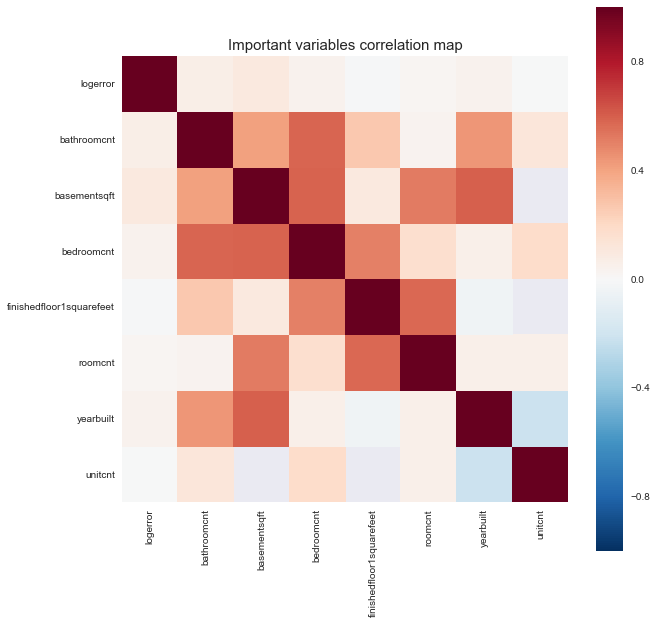

In [35]:
lst = ['logerror','bathroomcnt','basementsqft','bedroomcnt','finishedfloor1squarefeet','roomcnt','yearbuilt','unitcnt']

df_temp = df_train_full[lst]
corrmat = df_temp.corr(method='spearman')
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ade2710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12bfbcfd0>]], dtype=object)

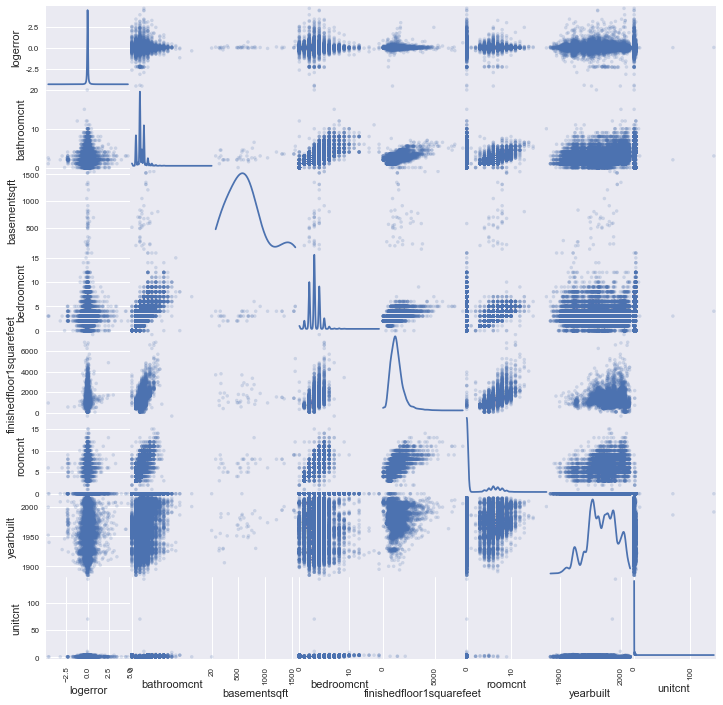

In [37]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_temp, alpha=0.2, figsize=(12, 12), diagonal='kde')

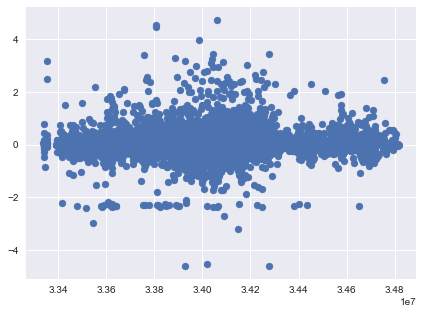

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(x=df_train_full.latitude.values, y=df_train_full.logerror.values)

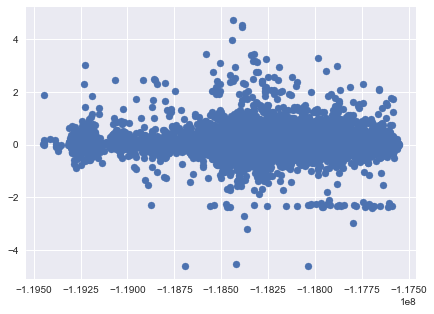

In [12]:
## Error versus longitude
plt.figure(figsize=(7,5))
plt.scatter(x=df_train_full.longitude.values, y=df_train_full.logerror.values)



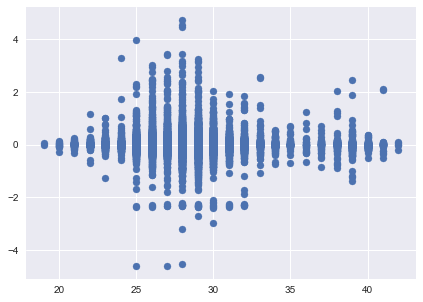

In [40]:
# Error versus number of missing values
df_train_full['num_missing'] = df_train_full.isnull().sum(axis=1) 
plt.figure(figsize=(7,5))
plt.scatter(x=df_train_full.num_missing.values, y=df_train_full.logerror.values)

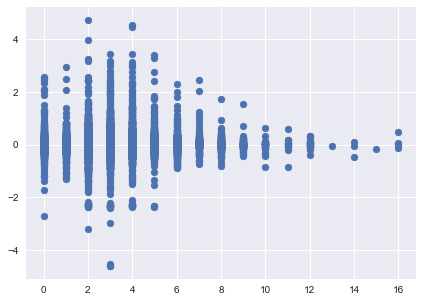

In [41]:
# Error versus number of bedroom
plt.figure(figsize=(7,5))
plt.scatter(x=df_train_full.bedroomcnt.values, y=df_train_full.logerror.values)